In [104]:
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np

In [105]:
rootdir = '/work/gam/MOM6/inputs/'
config = 'channel'
simulation = '4th-deg'

In [106]:
hgrid = xr.open_dataset(rootdir+config+'/'+'ocean_geometry.nc')

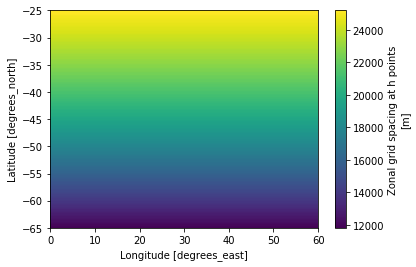

In [108]:
hgrid.dxT.plot()

## Specifying from ocean_geometry.nc file

In [ ]:
# ARRAYS FOR CELL BOUNDARY POSITIONS IN METRES
# X
zeros = xr.DataArray(np.zeros(shape=(hgrid['nyp'].size)),dims=['nyp'],coords={'nyp':hgrid['nyp']})
X = xr.concat([zeros, hgrid['dx'].cumsum(dim='nx')],dim='nx').rename({'nx':'nxp'})
hgrid['X'] = X
# Y
zeros = xr.DataArray(np.zeros(shape=(hgrid['nxp'].size)),dims=['nxp'],coords={'nxp':hgrid['nxp']})
Y = xr.concat([zeros, hgrid['dy'].cumsum(dim='ny')],dim='ny').rename({'ny':'nyp'})
hgrid['Y'] = Y

## Specifying from supergrid

In [65]:
# ARRAYS FOR CELL BOUNDARY POSITIONS IN METRES
# X
zeros = xr.DataArray(np.zeros(shape=(hgrid['nyp'].size)),dims=['nyp'],coords={'nyp':hgrid['nyp']})
X = xr.concat([zeros, hgrid['dx'].cumsum(dim='nx')],dim='nx').rename({'nx':'nxp'})
hgrid['X'] = X
# Y
zeros = xr.DataArray(np.zeros(shape=(hgrid['nxp'].size)),dims=['nxp'],coords={'nxp':hgrid['nxp']})
Y = xr.concat([zeros, hgrid['dy'].cumsum(dim='ny')],dim='ny').rename({'ny':'nyp'})
hgrid['Y'] = Y

In [63]:
# SUBSET EVERY 2 TO GET THE LOCATIONS OF THE GRID CELL CENTRES
hgrid_model = hgrid.isel(
    nxp=np.arange(1,hgrid['nxp'].size,2),
    nyp=np.arange(1,hgrid['nyp'].size,2))

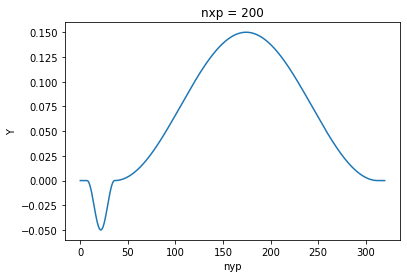

In [93]:
Y = hgrid['Y']
taux_east = 0.15
taux_west = 0.05
Ly = hgrid['Y'].max(xr.ALL_DIMS)
Lr = 100*1E3 # Width of sponge
Y0 = 500*1E3 # Boundary between ACC/ASF
Le = Ly-Lr-Y0 # Width of ACC
Yb = 1200*1E3 # Meridional position of bump
Ys = 300*1E3 # Location of continental slope
Lc = 100*1E3 # Width of shelf cooling
Lw = Y0-Lc # Width of ASF
condition1 = (Y>=Y0) & (Y<=(Ly-Lr)) 
taux = (taux_east*np.sin(np.pi*(Y-Y0)/Le)**2).where(condition1,0)
condition2 = (Y>=Lc) & (Y<=Y0)
taux = (-taux_west*np.sin(np.pi*(Y-Lc)/Lw)**2).where(condition2,0) + taux
taux.isel(nxp=200).plot()